In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


- 컬럼 간 단위 다름

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- 결측치 존재

In [7]:
# 결측값 제거

penguins = penguins.dropna().reset_index(drop = True)

## 정규화(normalization), 표준화(standardization)

- 수치형 데이터 전처리
- 학습 데이터의 feature 간 단위나 스케일 차이는 학습 모델의 성능 저하의 원인
- 따라서 수치형 데이터의 단위를 맞춰주는 스케일링(scaling) 필요
- 정규화(normalization): 최대값, 최소값 이용
- 표준화(standardization): 평균, 표준편차 사용

<AxesSubplot:ylabel='Count'>

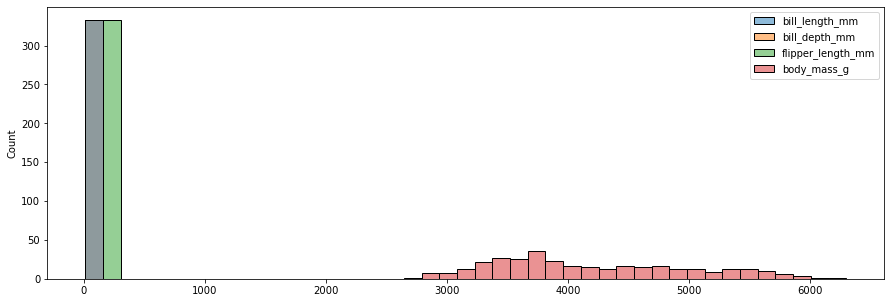

In [8]:
# 데이터 분포 확인

plt.figure(figsize = (15, 5))
sns.histplot(data = penguins)

### 정규화(normalization)

- minmaxscaler를 활용하여 0 ~ 1 사이의 분포 생성
- 같은 범위의 데이터로 변환하기 때문에 모델 학습 성능이 향상되고 학습시간이 감소됨
- 자릿수가 늘어나지 않아 연산 오버플로우(numeric overflow)를 방지

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

penguins_normed = penguins.copy()
features = penguins_normed[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]     # 수치형 컬럼만 정규화
features_normed = scaler.fit_transform(features)     # 정규화
features_normed

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [10]:
# 정규화된 데이터로 변환

penguins_normed = penguins_normed.assign(bill_length_mm = features_normed[:, 0],
                                        bill_depth_mm = features_normed[:, 1],
                                        flipper_length_mm = features_normed[:, 2],
                                        body_mass_g = features_normed[:, 3])
penguins_normed

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


<AxesSubplot:ylabel='Count'>

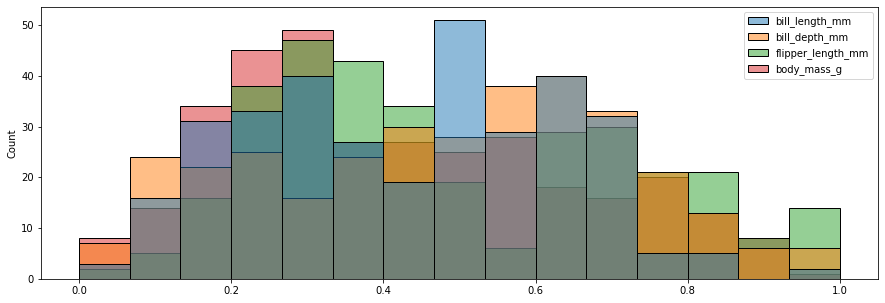

In [11]:
# 정규화 완료된 데이터 분포 확인

plt.figure(figsize = (15, 5))
sns.histplot(data = penguins_normed)

### 표준화(standardization)

- standardscaler를 활용하여 평균0, 표준편차 1인 분포 생성
- feature간 단위 차이가 많이 나는 상황이라면, 정규화보다는 표준화 선호
    - 정규화는 작은 범위로 데이터를 압축하기 때문에 정보 손실 발생
- 비지도학습(최대최소 알기 힘듦)에서도 표준화 선호

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

penguins_scaled = penguins.copy()
features = penguins_scaled[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]     # 수치형 데이터만 표준화
features_stand = scaler.fit_transform(features)
features_stand

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [14]:
# 표준화된 데이터로 변경

penguins_scaled = penguins_scaled.assign(bill_length_mm = features_stand[:, 0],
                                        bill_depth_mm = features_stand[:, 1],
                                        flipper_length_mm = features_stand[:, 2],
                                        body_mass_g = features_stand[:, 3])
penguins_scaled

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


<AxesSubplot:ylabel='Count'>

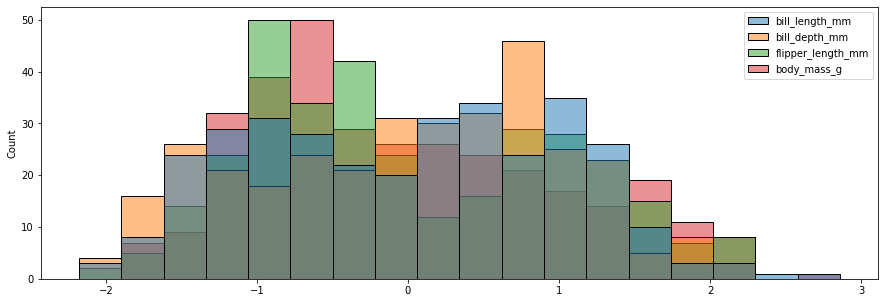

In [15]:
# 표준화된 데이터 분포 확인

plt.figure(figsize = (15, 5))
sns.histplot(data = penguins_scaled)

## 범주형 데이터의 수치화(인코딩, encoding)

- label encoding, one-hot encoding

In [16]:
penguins_scaled.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male


In [17]:
penguins_scaled['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [18]:
penguins_scaled['sex'].unique()

array(['Male', 'Female'], dtype=object)

### label encoding

- 범주형 데이터의 범주 가짓수에 따라 숫자를 할당

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

penguins_label = penguins_scaled.copy()
features = penguins_label[['species', 'island', 'sex']]     # 범주형 컬럼만 인코딩
encoded = features.apply(encoder.fit_transform)
encoded

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,1
...,...,...,...
328,2,0,0
329,2,0,0
330,2,0,1
331,2,0,0


In [20]:
# 수치형 데이터로 변경

penguins_label = penguins_label.assign(species = encoded['species'],
                                      island = encoded['island'],
                                      sex = encoded['sex'])
penguins_label

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,0
329,2,0,0.514098,-1.457000,1.002739,0.799674,0
330,2,0,1.173384,-0.744994,1.502928,1.919069,1
331,2,0,0.221082,-1.202712,0.788372,1.234995,0


### one-hot encoding

- 범주형 데이터의 범주 가짓수에 컬럼을 추가하는 방법
- 범주에 포함되는 컬럼에 1을 부여하고 다른 컬럼은 0을 부여

In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

penguins_onehot = penguins_scaled.copy()
features = penguins_onehot[['species', 'island', 'sex']]     # 범주형 컬럼만 인코딩
encoded = encoder.fit_transform(features).toarray()
encoded

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [22]:
encoder.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [23]:
# 기존 범주형 컬럼 삭제
penguins_onehot = penguins_onehot.drop(columns = ['species', 'island', 'sex'])

# 인코딩 결과 데이터프레임 생성
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = encoder.get_feature_names_out()

# 기존 데이터프레임과 결합
penguins_onehot = pd.concat([penguins_onehot, encoded_df], axis = 1)

penguins_onehot

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-0.896042,0.780732,-1.426752,-0.568475,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.822788,0.119584,-1.069474,-0.506286,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.676280,0.424729,-0.426373,-1.190361,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.335566,1.085877,-0.569284,-0.941606,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.859415,1.747026,-0.783651,-0.692852,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
329,0.514098,-1.457000,1.002739,0.799674,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
330,1.173384,-0.744994,1.502928,1.919069,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
331,0.221082,-1.202712,0.788372,1.234995,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## 학습/테스트 데이터 세트 분할

In [24]:
penguins_label.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1


In [25]:
from sklearn.model_selection import train_test_split

X = penguins_label.drop('sex', axis = 1)     # 예측에 사용할 변수
y = penguins_label['sex']     # 예측할 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [26]:
len(X_train), len(y_train)

(266, 266)

In [27]:
len(X_test), len(y_test)

(67, 67)

In [28]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
106,0,0,-0.786161,0.272157,-0.569284,-1.252549
66,0,2,-0.804474,0.017869,-0.354918,-0.817229
321,2,0,1.191698,-0.999282,1.074194,0.986240
9,0,2,-1.720150,2.001313,-0.212006,0.239977
59,0,0,-0.438204,0.424729,-0.640740,-0.319720
...,...,...,...,...,...,...
323,2,0,-0.090248,-0.999282,0.859828,0.550920
264,2,0,0.825428,-1.558715,1.360017,1.359372
15,0,0,-1.134117,0.577302,-1.926941,-1.003795
240,2,0,0.697233,-1.100997,1.002739,1.794692


In [29]:
y_train

106    0
66     0
321    0
9      1
59     1
      ..
323    0
264    1
15     0
240    1
89     1
Name: sex, Length: 266, dtype: int32

In [30]:
y_test

131    1
62     0
149    0
4      1
279    1
      ..
190    0
115    1
209    1
300    0
69     1
Name: sex, Length: 67, dtype: int32